# 🤔 Config

In [ ]:
# |default_exp utils.config

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()

In [ ]:
# |hide
import os; os.environ["DEBUG"] = "0"

In [ ]:
# |hide
from nbdev.showdoc import *
from fastcore.test import test_eq
from matplotlib import rcParams
from tinygrad.tensor import Tensor

In [ ]:
# |hide
# |export
from copy import copy
from types import SimpleNamespace
from typing import Optional as O, Union as U, Callable, TypeVar
from contextlib import contextmanager
from lovely_numpy import config as np_config

In [ ]:
# |exporti

class Config(SimpleNamespace):
    "Config"
    def __init__(self,
            precision     = 3,    # Digits after `.`
            threshold_max = 3,    # .abs() larger than 1e3 -> Sci mode
            threshold_min = -4,   # .abs() smaller that 1e-4 -> Sci mode
            sci_mode      = None, # Sci mode (2.3e4). None=auto
            auto_realize   = True,# Realize Tensors before printing
            show_mem_above= 1024, # Show memory footprint above this size
            indent        = 2,    # Indent for .deeper()
            color         = True, # ANSI colors in text
            deeper_width  = 9,    # For .deeper, width per level
            plt_seed      = 42,   # Sampling seed for `plot`
            fig_close     = True, # Close matplotlib Figure
            fig_show      = False,# Call `plt.show()` for `.plt`, `.chans` and `.rgb`

    ):
        super().__init__(**{k:v for k,v in locals().items() if k not in ["self", "__class__"]})

_defaults = Config()
_config = copy(_defaults)

### Defaults:

In [ ]:
# |echo: false
DocmentTbl(Config)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| precision | int | 3 | Digits after `.` |
| threshold_max | int | 3 | .abs() larger than 1e3 -> Sci mode |
| threshold_min | int | -4 | .abs() smaller that 1e-4 -> Sci mode |
| sci_mode | NoneType | None | Sci mode (2.3e4). None=auto |
| auto_realize | bool | True | Realize Tensors before printing |
| show_mem_above | int | 1024 | Show memory footprint above this size |
| indent | int | 2 | Indent for .deeper() |
| color | bool | True | ANSI colors in text |
| deeper_width | int | 9 | For .deeper, width per level |
| plt_seed | int | 42 | Sampling seed for `plot` |
| fig_close | bool | True | Close matplotlib Figure |
| fig_show | bool | False | Call `plt.show()` for `.plt`, `.chans` and `.rgb` |

In [ ]:
# |exporti

# Allows passing None as an argument to reset the 
class _Default():
    def __repr__(self):
        return "Ignore"
D = _Default()
Default = TypeVar("Default")

In [ ]:
# |export

def set_config( precision:      U[Default,int,None]  =D,
                threshold_min:  U[Default,int,None]  =D,
                threshold_max:  U[Default,int,None]  =D,
                sci_mode:       U[Default,bool,None] =D,
                auto_realize:    U[Default,bool,None] =D,
                show_mem_above: U[Default,int,None]  =D,
                indent:         U[Default,bool,None] =D,
                color:          U[Default,bool,None] =D,
                deeper_width:   U[Default,int,None]  =D,
                plt_seed:       U[Default,int,None]  =D,
                fig_close:      U[Default,bool,None] =D,
                fig_show:       U[Default,bool,None] =D
                ) -> None:

    "Set config variables"
    args = locals().copy()
    for k,v in args.items():
        if v != D:
            if v is None:
                setattr(_config, k, getattr(_defaults, k))
            else:
                setattr(_config, k, v)

In [ ]:
# |export
def get_config():
    "Get a copy of config variables"
    return copy(_config)

In [ ]:
# |export
@contextmanager
def config( precision:      U[Default,int,None]  =D,
            threshold_min:  U[Default,int,None]  =D,
            threshold_max:  U[Default,int,None]  =D,
            sci_mode:       U[Default,bool,None] =D,
            auto_realize:    U[Default,bool,None] =D,
            show_mem_above: U[Default,int,None]  =D,
            indent:         U[Default,bool,None] =D,
            color:          U[Default,bool,None] =D,
            deeper_width:   U[Default,int,None]  =D,
            plt_seed:       U[Default,int,None]  =D,
            fig_close:      U[Default,bool,None] =D,
            fig_show:       U[Default,bool,None] =D
            ):


    "Context manager for temporarily setting printting options."
    global _config
    new_opts = { k:v for k, v in locals().items() if v != D }
    old_opts = copy(get_config().__dict__)

    try:
        set_config(**new_opts)
        yield
    finally:
        set_config(**old_opts)

## Examples

In [ ]:
# |hide

# In the next cell I'm importing the functios from the exported .py as part of the examples code
# This overrides the functions defined above!
# Make sure the code is in sync

import nbdev; nbdev.nbdev_export()

In [ ]:
from lovely_grad import set_config, get_config, config, monkey_patch

In [ ]:
monkey_patch()

### Precision

In [ ]:
Tensor([1., 2, float("NaN")])

Tensor[3] μ=1.500 σ=0.500 NaN! CPU Realized FROMCPU [1.000, 2.000, nan]

In [ ]:
set_config(precision=5)
Tensor([1., 2, float("NaN")])

Tensor[3] μ=1.50000 σ=0.50000 NaN! CPU Realized FROMCPU [1.00000, 2.00000, nan]

In [ ]:
# |hide
# test_array_repr(str(jnp.array([1., 2, jnp.nan])),
#         'Array[3] μ=1.50000 σ=0.50000 \x1b[31mNaN!\x1b[0m gpu:0 [1.00000, 2.00000, nan]')

### Scientific mode

In [ ]:
set_config(sci_mode=True) # Force always on
Tensor([1., 2, float("NaN")])

Tensor[3] μ=1.50000e+00 σ=5.00000e-01 NaN! CPU Realized FROMCPU [1.00000e+00, 2.00000e+00, nan]

In [ ]:
#| hide
# test_array_repr(str(jnp.array([1., 2, jnp.nan])),
#         'Array[3] μ=1.50000e+00 σ=5.00000e-01 \x1b[31mNaN!\x1b[0m gpu:0 [1.00000e+00, 2.00000e+00, nan]')

### Color on/off

In [ ]:
set_config(color=False) # Force always off
Tensor([1., 2, float("NaN")])

Tensor[3] μ=1.50000e+00 σ=5.00000e-01 NaN! CPU Realized FROMCPU [1.00000e+00, 2.00000e+00, nan]

In [ ]:
# test_array_repr(str(jnp.array([1., 2, jnp.nan])),
#         'Array[3] μ=1.50000e+00 σ=5.00000e-01 NaN! gpu:0 [1.00000e+00, 2.00000e+00, nan]')

### Control .deeper

In [ ]:
# |hide
import numpy as np

In [ ]:
set_config(deeper_width=3) 
image = np.load("mysteryman.npy")
image[1,100,100] = float("NaN")

image = Tensor(image)

image.deeper(2)

Tensor[3, 196, 196] n=115248 x∈[-2.11790e+00, 2.64000e+00] μ=-3.88310e-01 σ=1.07318e+00 NaN! CPU Realized FROMCPU
  Tensor[196, 196] n=38416 x∈[-2.11790e+00, 2.24891e+00] μ=-3.24352e-01 σ=1.03588e+00 CPU
    Tensor[196] x∈[-1.91241e+00, 2.24891e+00] μ=-6.73483e-01 σ=5.21962e-01 CPU
    Tensor[196] x∈[-1.86103e+00, 2.16328e+00] μ=-7.38488e-01 σ=4.18080e-01 CPU
    Tensor[196] x∈[-1.75828e+00, 2.19753e+00] μ=-8.05501e-01 σ=3.96848e-01 CPU
    ...
  Tensor[196, 196] n=38416 x∈[-1.96569e+00, 2.42857e+00] μ=-2.73903e-01 σ=9.72652e-01 NaN! CPU
    Tensor[196] x∈[-1.86064e+00, 2.41106e+00] μ=-5.28772e-01 σ=5.55960e-01 CPU
    Tensor[196] x∈[-1.82563e+00, 2.35854e+00] μ=-5.61732e-01 σ=4.72772e-01 CPU
    Tensor[196] x∈[-1.75560e+00, 2.37605e+00] μ=-6.21756e-01 σ=4.58436e-01 CPU
    ...
  Tensor[196, 196] n=38416 x∈[-1.80444e+00, 2.64000e+00] μ=-5.66674e-01 σ=1.17776e+00 CPU
    Tensor[196] x∈[-1.71730e+00, 2.39599e+00] μ=-9.81537e-01 σ=3.50000e-01 CPU
    Tensor[196] x∈[-1.75216e+00, 2.32627e+

In [ ]:
# test_eq(len(str(image.deeper(2))), 1127)

### Reser to defaults

In [ ]:
set_config(precision=None, sci_mode=None, color=None, deeper_width=None)
Tensor([1., 2, float("NaN")])

Tensor[3] μ=1.500 σ=0.500 NaN! CPU Realized FROMCPU [1.000, 2.000, nan]

In [ ]:
# test_array_repr(str(jnp.array([1., 2, jnp.nan])),
#     'Array[3] μ=1.500 σ=0.500 \x1b[31mNaN!\x1b[0m gpu:0 [1.000, 2.000, nan]')

### Context manager

In [ ]:
display(Tensor([1., 2, float("NaN")]))
with config(sci_mode=True, color=False):
    display(Tensor([1., 2, float("NaN")]))
display(Tensor([1., 2, float("NaN")]))

Tensor[3] μ=1.500 σ=0.500 NaN! CPU Realized FROMCPU [1.000, 2.000, nan]

Tensor[3] μ=1.500e+00 σ=5.000e-01 NaN! CPU Realized FROMCPU [1.000e+00, 2.000e+00, nan]

Tensor[3] μ=1.500 σ=0.500 NaN! CPU Realized FROMCPU [1.000, 2.000, nan]

### Matplotlib and seed

In [ ]:
Tensor.manual_seed(42)

# torch.manual_seed(42)
# a = torch.randn(1000)

# key = jax.random.PRNGKey(0)
a = Tensor.randn(1000)

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }} 
%config InlineBackend.print_figure_kwargs = kwargs

In [ ]:
_ = a.plt() # The figure was closed, nothing is displayed

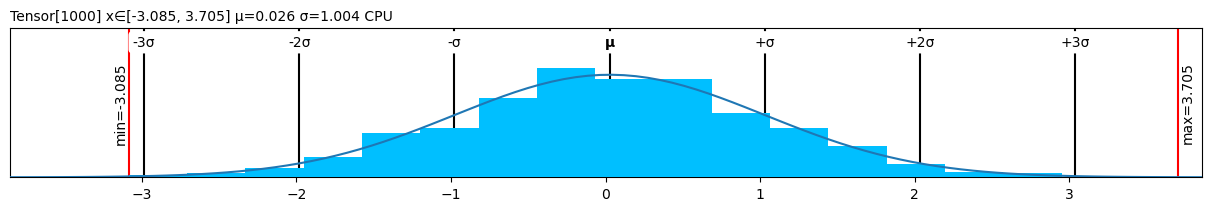

In [ ]:
set_config(fig_close=False)
_ = a.plt() # figure was not closed. All figures that are not closed are displayed after the cell runs.

In [ ]:
# |hide
set_config(fig_close=None)

For performance reasons, <code>.plt</code> will randomly sample up tp `max_s` elements from the data (10k be default).

You can change the seed used for this sampling (42 by default):

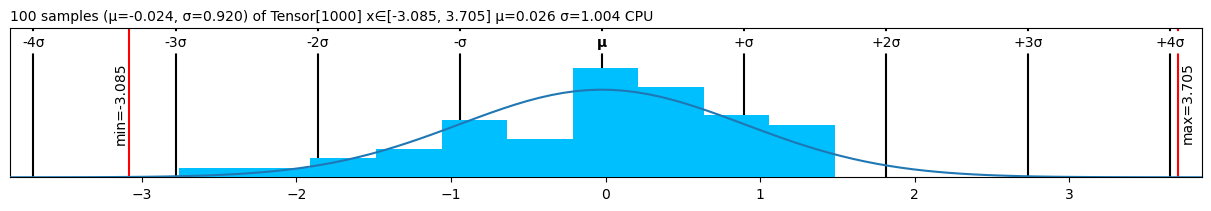

In [ ]:
set_config(plt_seed=1)
a.plt(max_s=100)

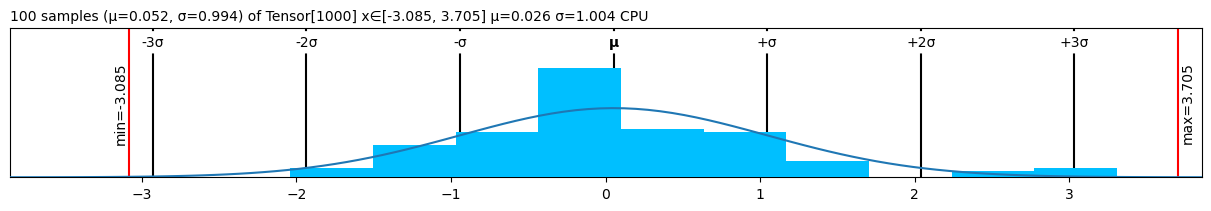

In [ ]:
set_config(plt_seed=2)
a.plt(max_s=100)

More details in [matplotlib](matplotlib.html)